# Analise de dados CSV (Comma-separated values)

Arquivos de texto que faz ordenação dos dados numa linha, separando os valores por virgulas.
> Utilizaremos funções simples para obter os dados e fazer as analises (`open`).


In [1]:
with open('./../dados/VILA-VELHA-(A634).csv', 'r') as f:
    next(f)
    cabecalho = next(f)
    for line in f:
        linha = line.split(';')

In [2]:
linha

['31/10/2019',
 '2300',
 '24,8',
 '25,0',
 '24,7',
 '82,0',
 '83,0',
 '82,0',
 '21,5',
 '21,7',
 '21,5',
 '1009,5',
 '1009,5',
 '1008,9',
 '3,3',
 '29,0',
 '6,8',
 '',
 '0,0',
 '\n']

In [3]:
cabecalho.split(';')

['Data',
 'Hora (UTC)',
 'Temp. Ins. (C)',
 'Temp. Max. (C)',
 'Temp. Min. (C)',
 'Umi. Ins. (%)',
 'Umi. Max. (%)',
 'Umi. Min. (%)',
 'Pto Orvalho Ins. (C)',
 'Pto Orvalho Max. (C)',
 'Pto Orvalho Min. (C)',
 'Pressao Ins. (hPa)',
 'Pressao Max. (hPa)',
 'Pressao Min. (hPa)',
 'Vel. Vento (m/s)',
 'Dir. Vento (m/s)',
 'Raj. Vento (m/s)',
 'Radiacao (KJ/m²)',
 'Chuva (mm)',
 '\n']

A ideia inicialmente é abrir o arquivo e buscar uma variavel específica

In [20]:
def get_var(nome_arquivo, nome_variavel):
    f = open(nome_arquivo)
    next(f)
    cabecalho = next(f)
    cabecalho = cabecalho.split(';')
    #print(cabecalho)
    idx = cabecalho.index(nome_variavel)
    variavel = []
    for row in f:
        row = row.split(';')
        variavel.append(row[idx].replace(',', '.'))
        #variavel.append(float(row[idx].replace(',', '.')))
    return variavel

# v_nova = get_var('./../dados/VILA-VELHA-(A634).csv', 'Vel. Vento (m/s)')
v_nova = get_var('./../dados/VILA-VELHA-(A634).csv', 'Radiacao (KJ/m²)')


In [28]:
import numpy as np

def get_var(nome_arquivo, nome_variavel):
    f = open(nome_arquivo)
    next(f)
    cabecalho = next(f)
    cabecalho = cabecalho.split(';')
    #print(cabecalho)
    idx = cabecalho.index(nome_variavel)
    variavel = []
    for row in f:
        row = row.split(';')
        # variavel.append(row[idx].replace(',', '.'))
        if row[idx]=='':
            variavel.append(np.nan)
        else:
            variavel.append(float(row[idx].replace(',', '.')))
    return variavel

# v_nova = get_var('./../dados/VILA-VELHA-(A634).csv', 'Vel. Vento (m/s)')
v_nova = get_var('./../dados/VILA-VELHA-(A634).csv', 'Radiacao (KJ/m²)')

In [29]:
print(type(v_nova))
print(type(v_nova[0]))
print(v_nova)


<class 'list'>
<class 'float'>
[nan, nan, nan, nan, nan, nan, nan, nan, 24.11, 190.11, 509.48, 739.15, 1698.37, 1525.37, 1040.21, 2437.72, 1467.43, 987.7, 472.83, 152.36, 24.38, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 44.25, 749.26, 1660.66, 2476.83, 3100.93, 3494.24, 3615.45, 3478.26, 3082.28, 2456.84, 1639.34, 757.81, 80.31, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 56.89, 692.49, 1570.16, 2349.23, 2345.45, 3241.57, 3610.74, 3477.24, 3093.09, 2465.66, 1650.92, 768.91, 72.78, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 37.94, 660.08, 871.26, 1636.95, 2725.81, 1969.35, 2378.66, 1640.36, 1882.68, 487.31, 601.05, 358.5, 41.17, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 53.69, 636.66, 1533.86, 735.88, 1949.1, 2216.22, 3267.81, 3407.91, 3071.71, 2475.06, 1647.46, 754.36, 98.33, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 44.67, 661.23, 1661.75, 2519.11, 2908.18, 3212.63, 3560.04, 3527.61, 3111.53, 2513.69, 1581.3, 785.46, 41.46,

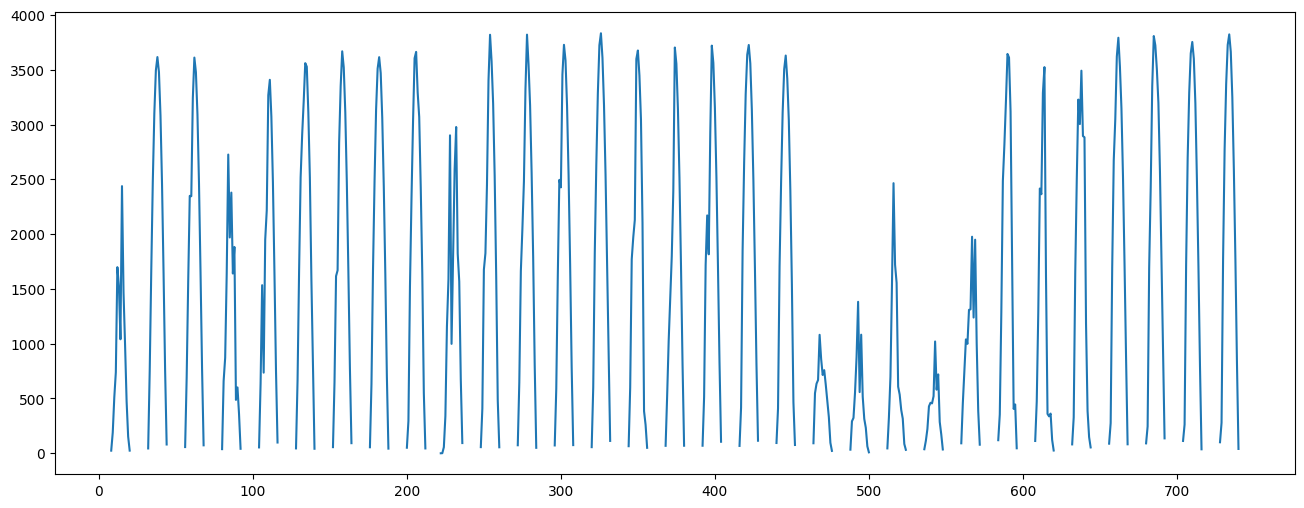

In [30]:
#!pip install matplotlib
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(16,6))
plt.plot(v_nova)

> Utilizando a função `csv`

In [37]:
import csv

def get_var(nome_arquivo, nome_variavel):
    f = open(nome_arquivo)
    rows = csv.reader(f, delimiter=';')
    next(rows)
    headers = next(rows)
    print(headers)
    ind = headers.index(nome_variavel)
    variavel = []
    for row in rows:
        variavel.append(float(row[ind].replace(',','.')))
    return variavel

variavel = get_var('./../dados/VILA-VELHA-(A634).csv', 'Vel. Vento (m/s)')

['Data', 'Hora (UTC)', 'Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)', 'Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)', 'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)', 'Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)', 'Vel. Vento (m/s)', 'Dir. Vento (m/s)', 'Raj. Vento (m/s)', 'Radiacao (KJ/m²)', 'Chuva (mm)', '']


* A leitura dos dados foi correta?
* Qué aconteceu com os dados?
> podemos ver o que esta acontecendo quando olharmos para o gráfico

In [38]:
print(variavel)

[1.5, 0.9, 1.8, 1.2, 1.1, 1.0, 1.2, 0.9, 1.0, 2.1, 0.4, 1.0, 2.1, 1.7, 1.9, 1.9, 1.7, 2.0, 1.6, 1.0, 0.7, 0.4, 0.5, 1.1, 1.2, 2.4, 1.8, 2.5, 1.1, 0.7, 1.6, 1.4, 1.6, 1.8, 1.8, 1.4, 1.6, 1.9, 2.5, 1.8, 3.0, 2.5, 1.5, 1.0, 1.0, 0.4, 1.1, 0.9, 1.9, 1.9, 2.9, 2.4, 1.5, 1.3, 1.7, 1.0, 1.7, 1.7, 4.8, 5.9, 3.9, 4.7, 5.9, 5.6, 6.2, 6.6, 7.2, 5.4, 4.1, 3.7, 3.0, 3.7, 2.1, 2.5, 2.8, 3.0, 2.8, 1.8, 2.9, 2.8, 2.3, 1.7, 3.0, 2.6, 4.2, 5.2, 6.4, 5.0, 6.4, 3.4, 2.7, 2.9, 1.8, 1.8, 2.1, 1.5, 2.8, 1.9, 2.0, 1.3, 1.1, 1.7, 1.8, 2.1, 2.4, 2.9, 3.8, 3.5, 4.5, 6.7, 6.6, 7.0, 6.7, 6.3, 6.9, 4.8, 3.8, 5.3, 4.5, 3.9, 3.4, 4.1, 3.3, 2.7, 2.5, 2.2, 2.5, 2.1, 2.8, 3.8, 5.0, 6.1, 6.1, 6.6, 7.9, 7.5, 7.7, 7.1, 6.1, 5.6, 5.6, 6.2, 4.5, 3.3, 3.4, 3.9, 3.8, 2.8, 2.9, 2.2, 2.6, 1.6, 2.2, 3.8, 5.6, 5.3, 6.4, 4.9, 6.9, 6.9, 7.0, 7.2, 7.4, 5.9, 3.5, 3.3, 4.8, 4.6, 3.1, 3.9, 2.6, 2.8, 3.8, 3.0, 2.9, 3.2, 3.6, 4.7, 6.3, 5.6, 5.5, 5.3, 6.6, 7.9, 8.5, 6.7, 5.4, 4.9, 5.4, 4.1, 4.1, 3.7, 4.3, 4.3, 4.0, 3.0, 3.9, 1.9, 2.1, 2.5,

In [48]:
print(f'maximo: {np.max(variavel)}')
print(f'minimo: {np.min(variavel)}')
print(f'media: {np.mean(variavel)}')
print(np.median(variavel))
print(np.std(variavel))
print(np.var(variavel))

maximo: 9.7
minimo: 0.4
media: 3.6759084791386267
3.4
1.969941948634873
3.880671280991361


In [23]:
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [24]:
!pip install matplotlib

435.80s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 8.0 MB/s eta 0:00:0000:0100:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 957.2/957.2 kB 8.7 MB/s eta 0:00:0000:0100:01
  Using cached Pillow-9.2.0-cp39-cp39-manylinux_2_28_x86_64.whl (3.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 7.7 MB/s eta 0:00:00:00:010:01m

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


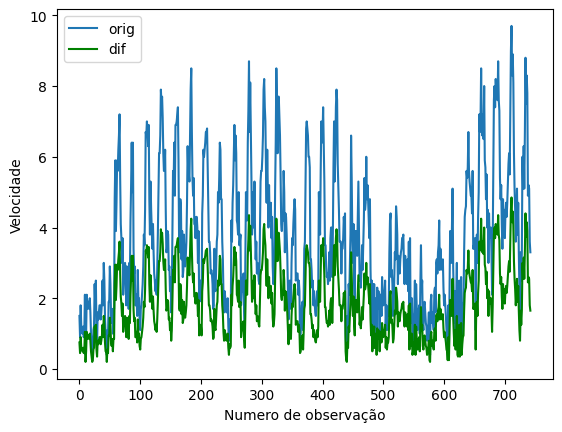

In [54]:
from cProfile import label
from matplotlib import pyplot as plt

plt.plot(variavel, label='orig')
plt.plot(np.divide(variavel,2), color='green', label='dif')
plt.xlabel('Numero de observação')
plt.ylabel('Velocidade')
plt.legend()

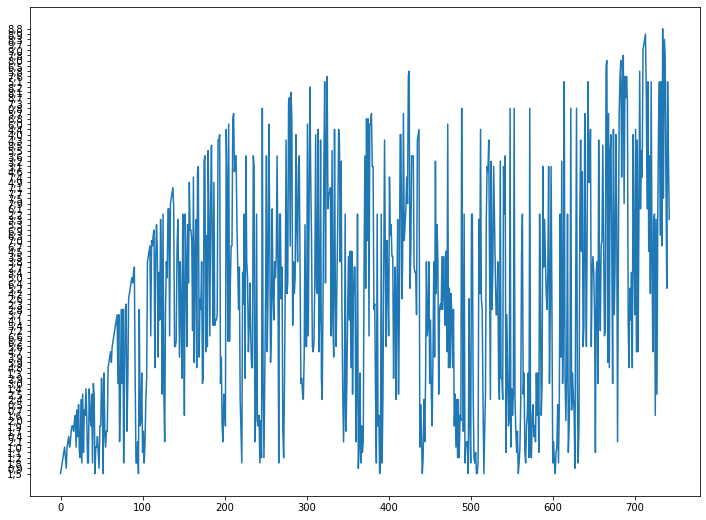

In [26]:
fig = plt.figure(figsize=(12, 9))
plt.plot(variavel)

## Agora devemos corrigir o que esta errado

In [ ]:
# O nosso problema é o tipo string e float

import csv

def get_var(nome_arquivo, nome_variavel):
    f = open(nome_arquivo)
    rows = csv.reader(f, delimiter=';')
    next(rows)
    headers = next(rows)
    print(headers)
    ind = headers.index(nome_variavel)
    variavel = []
    for row in rows:
        variavel.append(row[ind]) # <-- dica para a correção
    return variavel

variavel = get_var('./../dados/VILA-VELHA-(A634).csv', 'Vel. Vento (m/s)')